---
title: Filters design
subtitle: Ontwerp een circuit met de gewenste frequentiekarakteristiek
authors:
  - name: Jan Genoe
    orcid: 0000-0002-4019-5979
    affiliations:
      - KU Leuven
      - imec
bibliography:
  - ToegepasteAnalogeElektronica.bib
---

# Filter Design

In [2]:
from cursusdef import *

In dit hoofdstuk werk ik een aantal voorbeelden uit van berekening van filters. Dit hoofdstuk is slechts ter illustratie van een aantal voorbeelden. De eigenlijke cursus blijft wat te vinden is op Toledo.

## Aanpak en algemeen perspectief

Het ontwerp van een filter is eigenlijk het ontwerp van een zo compact mogelijk elektronisch circuit dat voldoet aan de vooraf opgelegde specificaties. In die zin is een filterontwerp een synthese oefening die het omgekeerde is van een analyse oefening.

[figuur analyse hier in te voegen]: <>

[figuur synthese hier in te voegen]: <>


## Eerste en tweede orde filters



### Eerste orde filter bouwblokken

De transfer functie van een eerste orde blok is:

$$ V_{out}=-\frac{b_1(j \omega) +b_0}{a_1(j \omega) +a_0} V_{in}$$

{numref}`fig1` toont een algemene bouwblok om een eerste orde filter mee te maken. 

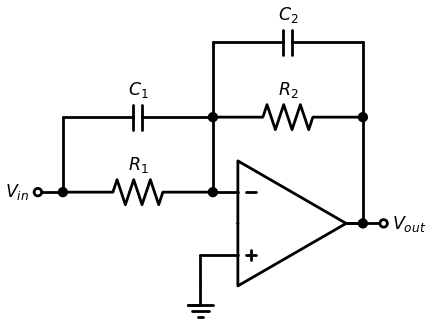

In [16]:
with schemdraw.Drawing() as d:
 d += (op := Opamp())
 d += ( Line( d='left', xy=op.in2, l=d.unit/4))
 d += ( Line( d='down', l=d.unit/5))
 d += ( Ground())
 d += ( Line( d='left', xy=op.in1, l=d.unit/6))
 d += (nn1 := Dot())
 d += (Rin := Resistor( d='left',  label='R1'))
 d += (nn2 := Dot())
 d += ( Line( d='left', l=d.unit/6))
 d += ( Dot(open=True,lftlabel='Vin'))
 d += ( Line( d='up',xy=nn1.start, l=d.unit/2))
 d += ( Dot())
 d += (Rf := Resistor(  d='right', l=d.unit*1, label='R2'))
 d += ( Dot())
 d += ( Capacitor(  d='left',xy=Rf.start, l=d.unit*1, label='C1'))
 d += ( Line( d='down',toy=Rin.end))
 d += ( Line( d='up',xy=Rf.start, l=d.unit/2))
 d += (Cout:= Capacitor(  d='right', l=d.unit*1, label='C2'))
 d += ( Line( d='down', toy=op.out))
 d += ( Dot())
 d += ( Line( d='left', tox=op.out))
 d += ( Line( d='right', l=d.unit/4))
 d += ( Dot(open=True,rgtlabel='Vout'))

Om dit basisblok in detail te berekenen schrijven we dit eerst in functie van de 2 impedanties $Z_1$ en $Z_2$ (zie {numref}`fig2`).

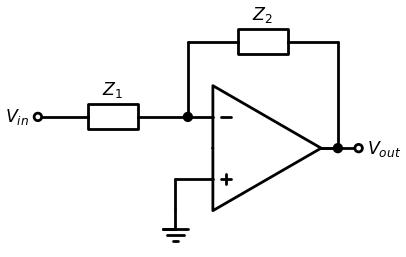

In [25]:
with schemdraw.Drawing() as d:
 d += (op := Opamp())
 d += ( Line( d='left', xy=op.in2, l=d.unit/4))
 d += ( Line( d='down', l=d.unit/5))
 d += ( Ground())
 d += ( Line( d='left', xy=op.in1, l=d.unit/6))
 d += (nn1 := Dot())
 d += (Rin := ResistorIEC( d='left',  label='Z1'))
 d += ( Dot(open=True,lftlabel='Vin'))
 d += ( Line( d='up',xy=nn1.start, l=d.unit/2))
 d += (Rf := ResistorIEC(  d='right', l=d.unit*1, label='Z2'))
 d += ( Line( d='down',toy=op.out))
 d += ( Dot())
 d += ( Line( d='left', tox=op.out))
 d += ( Line( d='right', l=d.unit/4))
 d += ( Dot(open=True,rgtlabel='Vout'))

De uitgang $V_{out}$ van dit bouwblok kunnen we schrijven als functie van de ingang $V_{in}$ als het volgt:

$$ V_{out} \approx -\frac{Z_2}{Z_1} V_{in} $$

met

$$\frac{1}{Z_1}=j \omega C_1 +\frac{1}{R_1}$$
$$\frac{1}{Z_2}= j \omega C_2 +\frac{1}{R_2}$$

Indien $C_1$ en $C_2$ niet nul zijn, kunnen we dit verder uitwerken als:

$$ V_{out} \approx -\frac{C_1}{C_2} \frac{j \omega  +\frac{1}{R_1 C_1}}{j \omega  +\frac{1}{R_2 C_2}} V_{in} $$


$$ V_{out} \approx -\frac{C_1}{C_2} \frac{j \omega  -n_1 }{j \omega  -p_1} V_{in} $$


waarbij $n_1 = \frac{1}{R_1 C_1} $ en $ p_1= \frac{1}{R_2 C_2} $. Het bovenstaande bouwblok kunnen we in zijn algemene vorm gebruiken (met dus 2 weerstanden en 2 condensators), waarbij we zowel een pool als een nul bekomen. Voor heel wat toepassingen kunnen we echter een van de 4 elementen weglaten. {numref}`fig3`  toont het circuit voor een eerste orde laagdoorlaat met transferfunctie:

$$ V_{out} \approx -\frac{1}{R_1 C_2} \frac{1 }{j \omega  -p_1} V_{in} $$

wat bij voldoende lage frequentie $ V_{out} \approx -\frac{R_2}{R_1 }  V_{in} $ geeft 

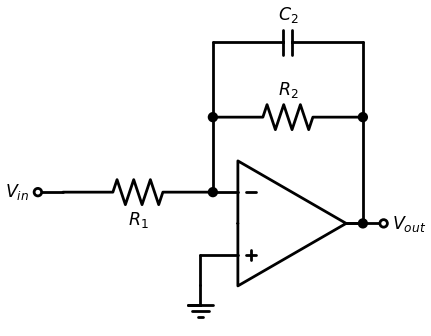

In [3]:
first_Order_LP_draw()

Op een gelijkaardige wijze kunnen we uitrekenen dat het circuit in {numref}`fig4`  ons een hoogdoorlaatfilter geeft met responsie:

$$ V_{out} \approx -\frac{C_1}{ C_2} \frac{j \omega }{j \omega  -p_1} V_{in} $$

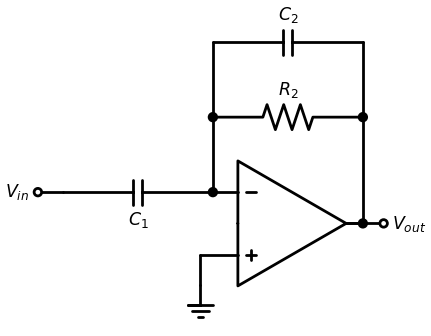

In [29]:
with schemdraw.Drawing() as d:
 d += (op := Opamp())
 d += ( Line( d='left', xy=op.in2, l=d.unit/4))
 d += ( Line( d='down', l=d.unit/5))
 d += ( Ground())
 d += ( Line( d='left', xy=op.in1, l=d.unit/6))
 d += (nn1 := Dot())
 d += (Rin := Capacitor( d='left',  botlabel='C1'))
 d += ( Line( d='left', l=d.unit/6))
 d += ( Dot(open=True,lftlabel='Vin'))
 d += ( Line( d='up',xy=nn1.start, l=d.unit/2))
 d += ( Dot())
 d += (Rf := Resistor(  d='right', l=d.unit*1, label='R2'))
 d += ( Dot())
 d += ( Line( d='up',xy=Rf.start, l=d.unit/2))
 d += (Cout := Capacitor(  d='right', l=d.unit*1, label='C2'))
 d += ( Line( d='down', toy=op.out))
 d += ( Dot())
 d += ( Line( d='left', tox=op.out))
 d += ( Line( d='right', l=d.unit/4))
 d += ( Dot(open=True,rgtlabel='Vout'))

### Tweede orde filter blokken

De transfer functie van een tweede orde blok is:

$$ V_{out} = - \frac{b_2 (j \omega)^2  + b_1(j \omega) +b_0}{a_2 (j \omega)^2  + a_1(j \omega) +a_0} V_{in}$$

Dit algemene tweede orde blok kan uitgewerkt worden in een BiQuad filter. Maar het algemene BiQuad blok vereist 4 Opamps. Daarom is het voor de meeste toepassingen handig gebruik te maken van de Sallen en Key filter, die maar 1 opamp nodig heeft.

#### BiQuad filter

##### Het gedeelte van het biquad circuit dat de polen bepaalt

We werken hieronder het circuit uit in 2 stappen. We berekenen hiervoor eerst de spanningen uit op de knopen van het bovenste gedeelte van het BiQuad circuit dat we tonen in {numref}`fig5` .  Het doel van dit deel van het circuit is dit uit te rekenen als een universeel circuit voor:

$$ V_{out*} = - \frac{1}{a_2 (j \omega)^2  + a_1 (j \omega) +a_0} V_{in} $$

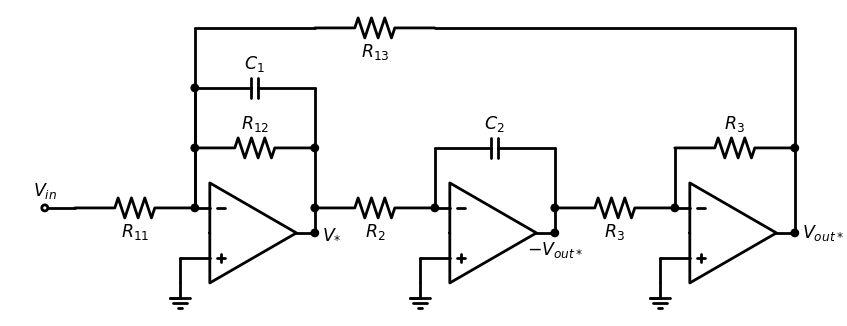

In [57]:
with schemdraw.Drawing(inches_per_unit=0.4) as d:
 d += ( Dot(open=True,label='Vin'))
 d += ( Line( d='right', l=d.unit/4))
 d += (Rin := Resistor( botlabel='R11'))
 d += (op1in := Dot())
 d += ( Line( d='right', l=d.unit/8))
 d += (op1 := Opamp(anchor='in1'))
 d += ( Line( d='left', xy=op1.in2, l=d.unit/4))
 d += ( Line( d='down', l=d.unit/5))
 d += ( Ground())
 d += ( Line(xy=op1in.start, d='up', l=d.unit/2))
 d += ( Dot())
 d += (R1 := Resistor(  d='right', l=d.unit*1, label='R12'))
 d += ( Dot())
 d += ( Line( d='up',xy=R1.start, l=d.unit/2))
 d += ( Dot())
 d += ( Capacitor(  d='right', l=d.unit*1, label='C1'))
 d += ( Line( d='down', toy=op1.in1))
 d += (nn1 := Dot())
 d += ( Line( d='down', toy=op1.out))
 d += ( Dot(rgtlabel='V∗'))
 d += ( Line( d='left', tox=op1.out))
 d += (Rin2 := Resistor(d='right', xy=nn1.start, botlabel='R2'))
 d += (op2in := Dot())
 d += ( Line( d='right', l=d.unit/8))
 d += (op2 := Opamp(anchor='in1'))
 d += ( Line( d='left', xy=op2.in2, l=d.unit/4))
 d += ( Line( d='down', l=d.unit/5))
 d += ( Ground())
 d += ( Line(xy=op2in.start, d='up', l=d.unit/2))
 d += ( Capacitor(  d='right', l=d.unit*1, label='C2'))
 d += ( Line( d='down', toy=op2.in1))
 d += (nn2 := Dot())
 d += ( Line( d='down', toy=op2.out))
 d += ( Dot(botlabel='−Vout∗'))
 d += ( Line( d='left', tox=op2.out))
 d += (Rin3 := Resistor( d='right', xy=nn2.start, botlabel='R3'))
 d += (op3in := Dot())
 d += ( Line( d='right', l=d.unit/8))
 d += (op3 := Opamp(anchor='in1'))
 d += ( Line( d='left', xy=op3.in2, l=d.unit/4))
 d += ( Line( d='down', l=d.unit/5))
 d += ( Ground())
 d += ( Line(xy=op3in.start, d='up', l=d.unit/2))
 d += ( Resistor(  d='right', l=d.unit*1, label='R3'))
 d += (nn4 := Dot())
 d += ( Line( d='down', toy=op3.out))
 d += (nn3 := Dot(rgtlabel='Vout∗'))
 d += ( Line( d='left', tox=op3.out))
 d += ( Line( d='up',xy=nn4.start, l=d.unit))
 d += ( Line( d='left', l=d.unit*3))
 d += (R3 := Resistor( d='left',botlabel='R13'))
 d += ( Line( d='left', tox=op1in.start))
 d += ( Line( d='down', toy=op1in.start))

Om het gedrag van het bovenste gedeelte van het BiQuad filter te beschrijven, werken we eerst de impedantie uit van de elementen die verschillen van de weerstanden, namelijk $Z_1$ en $Z_2$:

$$\frac{1}{Z_1}=j \omega C_1 +\frac{1}{R_{12}}$$
$$\frac{1}{Z_2}= j \omega C_2 $$

Omdat we weten dat de derde opamp een eenvoudige inverterende opamp is, hoeven we enkel de relatie tussen in en out van de 2 eerste opamps uit te werken. We bekomen het stelsel:

$$V_*=-\frac{Z_1}{R_{11}} V_{in} -\frac{Z_1}{R_{13}} V_{out*}$$

$$ -V_{out*}= -\frac{Z_2}{R_{2}} V_* $$

of 

$$ V_* =\frac{R_2}{Z_2} V_{out*}  $$

wanneer we vervolgens $ V_* $ elimineren krijgen we de volgende vergelijking voor $ V_{out*}$

$$ \frac{R_2}{Z_2} V_{out*} =-\frac{Z_1}{R_{11}} V_{in} -\frac{Z_1}{R_{13}} V_{out*}$$

$$ \left(\frac{R_2}{Z_2}+\frac{Z_1}{R_{13}}\right)  V_{out*} =-\frac{Z_1}{R_{11}} V_{in} $$

$$   V_{out*} =-\frac{Z_1}{R_{11}\left(\frac{R_2}{Z_2}+\frac{Z_1}{R_{13}}\right)} V_{in} $$

$$   V_{out*} =-\frac{1}{R_{11}\left(\frac{R_2}{Z_2 Z_1}+\frac{1}{R_{13}}\right)} V_{in} $$

$$   V_{out*} =-\frac{1}{R_{11}\left(R_2 j \omega C_2 (j \omega C_1 +\frac{1}{R_{12}}) +\frac{1}{R_{13}}\right)} V_{in} $$

$$   V_{out*} =-\frac{1}{R_{11} R_2 C_2 C_1(j \omega)^2  + \frac{R_{11}R_2 C_2}{R_{12}}(j \omega) +\frac{R_{11}}{R_{13}}} V_{in} $$



En $V_*$ wordt dan:

$$   V_{*} =-\frac{C_2 R_2 j \omega }{R_{11} R_2 C_2 C_1(j \omega)^2  + \frac{R_{11}R_2 C_2}{R_{12}}(j \omega) +\frac{R_{11}}{R_{13}}} V_{in} $$


Dit kunnen we vervolgens herschrijven als

$$ V_{out*} =-\frac{1}{a_2 (j \omega)^2  + a_1 (j \omega) +a_0} V_{in} $$ (biquadout)

en 

$$ V_{*} =-\frac{C_2 R_2(j \omega)}{a_2 (j \omega)^2  + a_1(j \omega) +a_0} V_{in} $$

met

$$  a_2= R_{11} C_1 R_2 C_2 $$ (biquada2)

$$  a_1=  \frac{R_{11} }{R_{12}} R_2 C_2$$(biquada1)

$$  a_0= \frac{R_{11}}{R_{13}}$$(biquada0)

We zien dus inderdaad uit vergelijkingen ({eq}`biquadout`,{eq}`biquada2`,{eq}`biquada1`,{eq}`biquada0`) dat we dit kunnen uitwerken als de gevraagde universele oplossing op voorwaarde dat de coeficienten $a_2,a_1$ en $a_0$ allemaal positieve coeficienten zijn.

##### Het volledige BiQuad circuit

Het hierboven aangegeven circuit kunnen we verder uitbreiden om ook nog 2 (complexen) nullen toe te voegen. Hiervoor combineren we de spanning op 3 knopen van het circuit in {numref}`fig5` , namelijk $V_{in}$,  $V_{*}$ en$V_{out*}$. Dit geeft dan het circuit in {numref}`fig6` .

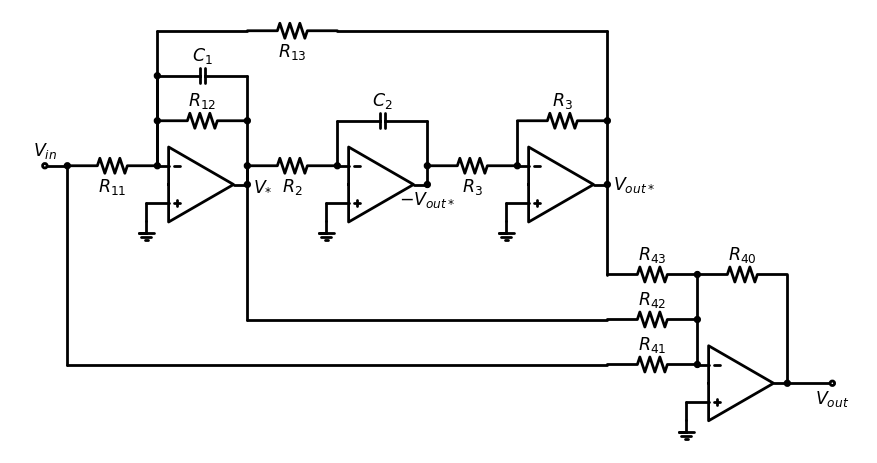

In [54]:
with schemdraw.Drawing(inches_per_unit=0.3) as d:
 d += ( Dot(open=True,label='Vin'))
 d += ( Line( d='right', l=d.unit/4))
 d += (Rin := Resistor( botlabel='R11'))
 d += (op1in := Dot())
 d += ( Line( d='right', l=d.unit/8))
 d += (op1 := Opamp(anchor='in1'))
 d += ( Line( d='left', xy=op1.in2, l=d.unit/4))
 d += ( Line( d='down', l=d.unit/5))
 d += ( Ground())
 d += ( Line(xy=op1in.start, d='up', l=d.unit/2))
 d += ( Dot())
 d += (R1 := Resistor(  d='right', l=d.unit*1, label='R12'))
 d += ( Dot())
 d += ( Line( d='up',xy=R1.start, l=d.unit/2))
 d += ( Dot())
 d += ( Capacitor(  d='right', l=d.unit*1, label='C1'))
 d += ( Line( d='down', toy=op1.in1))
 d += (nn1 := Dot())
 d += ( Line( d='down', toy=op1.out))
 d += ( Dot(rgtlabel='V∗'))
 d += ( Line( d='left', tox=op1.out))
 d += (Rin2 := Resistor(d='right', xy=nn1.start, botlabel='R2'))
 d += (op2in := Dot())
 d += ( Line( d='right', l=d.unit/8))
 d += (op2 := Opamp(anchor='in1'))
 d += ( Line( d='left', xy=op2.in2, l=d.unit/4))
 d += ( Line( d='down', l=d.unit/5))
 d += ( Ground())
 d += ( Line(xy=op2in.start, d='up', l=d.unit/2))
 d += ( Capacitor(  d='right', l=d.unit*1, label='C2'))
 d += ( Line( d='down', toy=op2.in1))
 d += (nn2 := Dot())
 d += ( Line( d='down', toy=op2.out))
 d += ( Dot(botlabel='−Vout∗'))
 d += ( Line( d='left', tox=op2.out))
 d += (Rin3 := Resistor( d='right', xy=nn2.start, botlabel='R3'))
 d += (op3in := Dot())
 d += ( Line( d='right', l=d.unit/8))
 d += (op3 := Opamp(anchor='in1'))
 d += ( Line( d='left', xy=op3.in2, l=d.unit/4))
 d += ( Line( d='down', l=d.unit/5))
 d += ( Ground())
 d += ( Line(xy=op3in.start, d='up', l=d.unit/2))
 d += ( Resistor(  d='right', l=d.unit*1, label='R3'))
 d += (nn4 := Dot())
 d += ( Line( d='down', toy=op3.out))
 d += (nn3 := Dot(rgtlabel='Vout∗'))
 d += ( Line( d='left', tox=op3.out))
 d += ( Line( d='up',xy=nn4.start, l=d.unit))
 d += ( Line( d='left', l=d.unit*3))
 d += (R3 := Resistor( d='left',botlabel='R13'))
 d += ( Line( d='left', tox=op1in.start))
 d += ( Line( d='down', toy=op1in.start))
 d += ( Line( d='down', xy=nn3.start, l=d.unit))
 d += ( Resistor(  d='right', l=d.unit*1, label='R43'))
 d += (nn5 := Dot())
 d += ( Line( d='down',  l=d.unit/2))
 d += (nn6 := Dot())
 d += ( Resistor(  d='left', l=d.unit*1, label='R42'))
 d += ( Line( d='left', tox=nn1.start))
 d += ( Line( d='up', toy=nn1.start))
 d += ( Line( d='down', xy=nn6.start,  l=d.unit/2))
 d += (nn7 := Dot())
 d += ( Resistor(  d='left', l=d.unit*1, label='R41'))
 d += ( Line( d='left', tox=Rin.start))
 d += ( Line( d='up', toy=Rin.start))
 d += ( Dot())
 d += ( Line( d='right', xy=nn7.start, l=d.unit/8))
 d += (op4 := Opamp(anchor='in1'))
 d += ( Line( d='left', xy=op4.in2, l=d.unit/4))
 d += ( Line( d='down', l=d.unit/5))
 d += ( Ground())
 d += ( Resistor(  d='right', xy=nn5.start, l=d.unit*1, label='R40'))
 d += ( Line( d='down', toy=op4.out))
 d += (nn8 := Dot())
 d += ( Line( d='left', tox=op4.out))
 d += ( Line( d='right',xy=nn8.start, l=d.unit/2))
 d += ( Dot(open=True,botlabel='Vout'))

$$ V_{out}=-\frac{R_{40}}{R_{41}} V_{in}- \frac{R_{40}}{R_{42}} V_{*} - \frac{R_{40}}{R_{43}} V_{out*} $$

$$ V_{out}=-\frac{\frac{R_{40}}{R_{41}} (a_2 (j \omega)^2  + a_1(j \omega) +a_0) - \frac{R_{40}}{R_{42}} C_2 R_2(j \omega) - \frac{R_{40}}{R_{43}}  }{a_2 (j \omega)^2  + a_1(j \omega) +a_0} V_{in}$$


$$ V_{out}=-\frac{a_2 \frac{R_{40}}{R_{41}}  (j \omega)^2  +\left( a_1\frac{R_{40}}{R_{41}}- C_2 R_2\frac{R_{40}}{R_{42}}\right)(j \omega) +
\left(a_0\frac{R_{40}}{R_{41}}   - \frac{R_{40}}{R_{43}} \right) }{a_2 (j \omega)^2  + a_1(j \omega) +a_0} V_{in}$$

Dit kan dan weer herschreven worden als:

$$ V_{out}=-\frac{b_2(j \omega)^2  +b_1(j \omega) +b_0}{a_2 (j \omega)^2  + a_1(j \omega) +a_0} V_{in}$$


met

$$  b_2= a_2 \frac{R_{40}}{R_{41}}= \frac{R_{40}}{R_{41}}R_{11} C_1 R_2 C_2$$

$$  b_1= a_1\frac{R_{40}}{R_{41}}- C_2 R_2\frac{R_{40}}{R_{42}}=\left( \frac{R_{11} R_{40}}{R_{12}R_{41}} -\frac{R_{40}}{R_{42}}  \right)R_2 C_2$$

$$  b_0= a_0\frac{R_{40}}{R_{41}}   - \frac{R_{40}}{R_{43}} =\frac{R_{11}}{R_{13}}\frac{R_{40}}{R_{41}}   - \frac{R_{40}}{R_{43}}$$

#### Sallen en Key Circuit

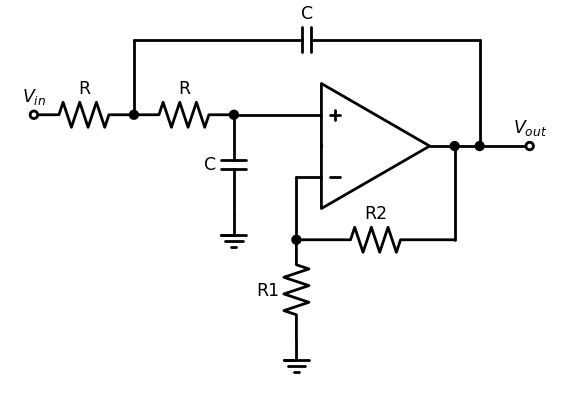

In [3]:
Sallen_and_Key_LP_draw()

## Frequentietransformaties

In dit deel van het hoofdstuk over filters gaan we dieper in op de manier waarop het ontwerp van een laagdoorlaatfilter kan herschreven worden naar een hoogdoorlaatfilter, een banddoorlaatflter of een bandsper filter.

Hiervoor gaan we typisch de transferfunctie herschrijven als functie van de parameter $S$, die gelijk is aan:

$$S=\frac{i \omega}{\omega_o} $$

Dit wil dan ook zeggen dat elke term met een pool of een nul in de vorm van $i \omega - p_i $ of $i \omega - n_i $ gelijk wordt aan

$$i \omega - p_i =\frac{i \omega}{\omega_o}- \frac{p_i}{\omega_o} = S - \frac{p_i}{\omega_o}  $$

$$i \omega - n_i =\frac{i \omega}{\omega_o}- \frac{n_i}{\omega_o} = S - \frac{n_i}{\omega_o}  $$

Het nu vervolgens de $S$ in de bovenstaande termen die we gaan vervangen door een andere term en dan gaan bekijken waar de nieuwe polen en nullen komen te liggen.


### Omrekenen van een laagdoorlaatfilter naar een hoogdoorlaatfilter

De frequentietransformatie die we hiervoor gebruiken is:

$$S=\frac{\omega_o}{i \omega} $$

De termen van de vorm $S - \frac{p_i}{\omega_o}  $ kunnen we vervolgens herschrijven door de S in te vullen.

$$S - \frac{p_i}{\omega_o}  = \frac{\omega_o}{i \omega} - \frac{p_i}{\omega_o} =   \frac{\omega_o - \frac{p_i}{\omega_o} i \omega}{i \omega }
=-\frac{\omega_o}{p_i} \frac{i \omega - \frac{\omega_o^2}{p_i}}{i \omega} $$ 

Na deze transformatie van laagdoorlaatfilter naar hoogdoorlaatfilter hebben we dus een nieuwe pool $\frac{\omega_o^2}{p_i}$ en en nieuwe nul (op 0) bekomen, maar in het geval van een Butterworth filter gaat dat niet het geval zijn, want we kunnen de polen van de Butterworth filter schrijven als:

$$ p_i= \omega_o ( \cos(\phi)+ i \sin(\phi)) $$

In dat geval gaat

$$ \frac{\omega_o^2}{p_i}=\frac{\omega_o^2}{\omega_o ( \cos(\phi)+ i \sin(\phi))} =\omega_o ( \cos(\phi)- i \sin(\phi)) $$

wat dus de complex toegevoegde is van de originele pool. En aangezien de polen steeds in complex toegevoegde paren moeten voorkomen veranderen de polen van de Butterworth filter niet maar komen er wel nullen bij. Voor de  Chebyshev filters filters veranderen de polen door deze transfromatie wel van plaats.

Hetzelfde kunnen we dan doen voor de eventuele termen van de vorm $S - \frac{n_i}{\omega_o}  $

### Omrekenen van een laagdoorlaatfilter naar een banddoorlaatfilter

De frequentietransformatie die we hiervoor gebruiken is:

$$S=\frac{1}{\omega_2-\omega_1}\frac{(i \omega)^2 + \omega_1\omega_2}{i \omega} $$

Ook hier kunnen we de termen van de vorm $S - \frac{p_i}{\omega_o}  $ en $S - \frac{n_i}{\omega_o}$ zoals hierboven herschrijven. We werken dat hieronder uit aan de hand van een voorbeeld.

### Voorbeeld: Omrekenen van de polen van een 2de orde laagdoorlaatfilter naar een 2de orde banddoorlaatfilter

In deze paragraaf rekenen we de polen van een 2de orde banddoorlaatfilter uit op basis van een 2de orde laagdoorlaatfilter.
Als vertrekbasis nemen we een 2de orde Butterworth laagdoorlaatfilter met afsnijfrequentie 50 kHz.
De polen van deze Butterworth laagdoorlaatfilter zijn:

$$ p_1=-\omega_o \frac{\sqrt{2}}{2}(1+ i)  $$
$$ p_2=-\omega_o \frac{\sqrt{2}}{2}(1-i)  $$

waarbij $\omega_o = 2 \pi$  50000.  En de transferfunctie is:

$$ T(i \omega)=\frac{p_1 p_2}{(i \omega- p_1)(i \omega- p_2)} $$

Als een gevolg hiervan kunnen we de termen in de noemer van de transferfunctie als volgt weergeven: 

$$ i \omega- p_1 = i \omega+\omega_o \frac{\sqrt{2}}{2}(1+i) =\omega_o\left( \frac{i \omega}{\omega_o}+ \frac{\sqrt{2}}{2}(1+ i) \right)$$
$$ i \omega- p_2 = i \omega+\omega_o \frac{\sqrt{2}}{2}(1-i) =\omega_o\left( \frac{i \omega}{\omega_o}+ \frac{\sqrt{2}}{2}(1- i) \right)$$

Dit kunnen we nu uitdrukken als een functie van de parameter $S$ waarbij

$$S=\frac{i \omega}{\omega_o} $$

Dit geeft dan:

$$ i \omega- p_1 =\omega_o\left( S+ \frac{\sqrt{2}}{2}(1+ i) \right)$$
$$ i \omega- p_2 =\omega_o\left( S+ \frac{\sqrt{2}}{2}(1- i) \right)$$

Voor de overeenstemmende banddoorlaatfilter kunnen we stellen:

$$S=\frac{1}{\omega_2-\omega_1}\frac{(i \omega)^2 + \omega_1\omega_2}{i \omega} $$


Wanneer we dit opnieuw inullen in de beide bovenstaande termen krijgen we:

$$ \omega_o\left( \frac{1}{\omega_2-\omega_1}\frac{(i \omega)^2 + \omega_1\omega_2}{i \omega}+ \frac{\sqrt{2}}{2}(1+ i) \right)$$
$$ \omega_o\left( \frac{1}{\omega_2-\omega_1}\frac{(i \omega)^2 + \omega_1\omega_2}{i \omega}+ \frac{\sqrt{2}}{2}(1- i) \right)$$

We kunnen nu beide termen op gelijke noemer brengen. Dit geeft ons:

$$   \frac{\omega_o}{\omega_2-\omega_1}\left( \frac{(i \omega)^2 + \frac{\sqrt{2}}{2}(1+ i)(\omega_2-\omega_1)(i \omega)+ \omega_1\omega_2}{i \omega} \right)$$
$$   \frac{\omega_o}{\omega_2-\omega_1}\left( \frac{(i \omega)^2 + \frac{\sqrt{2}}{2}(1- i)(\omega_2-\omega_1)(i \omega)+ \omega_1\omega_2}{i \omega} \right)$$

De nieuwe transferfunctie wordt dan:

$$ T(i \omega)=\frac{p_1 p_2}
{\frac{\omega_o}{\omega_2-\omega_1}\left( \frac{(i \omega)^2 + \frac{\sqrt{2}}{2}(1+ i)(\omega_2-\omega_1)(i \omega)+ \omega_1\omega_2}{i \omega} \right)
\frac{\omega_o}{\omega_2-\omega_1}\left( \frac{(i \omega)^2 + \frac{\sqrt{2}}{2}(1- i)(\omega_2-\omega_1)(i \omega)+ \omega_1\omega_2}{i \omega} \right)} $$


Dit kunner we verder uitwerken als:

$$ T(i \omega)=\frac{(\omega_2-\omega_1)^2(i \omega)^2}
{\left((i \omega)^2 + \frac{\sqrt{2}}{2}(1+ i)(\omega_2-\omega_1)(i \omega)+ \omega_1\omega_2 \right)
\left( (i \omega)^2 + \frac{\sqrt{2}}{2}(1- i)(\omega_2-\omega_1)(i \omega)+ \omega_1\omega_2 \right)} $$

In de noemer zien we nu 2 kwadratische vergelijkingen in $i \omega $ staan. we kunnen voor elk van deze vergelijkingen de nulpunten uitrekenen. Dit levert ons de volgende 4 polen op:

$$ p_{1,1}= \frac{-\frac{\sqrt{2}}{2}(1+ i)(\omega_2-\omega_1)+\sqrt{(\frac{\sqrt{2}}{2}(1+ i)(\omega_2-\omega_1))^2-4\omega_1\omega_2}}{2} $$
$$ p_{1,2}= \frac{-\frac{\sqrt{2}}{2}(1+ i)(\omega_2-\omega_1)-\sqrt{(\frac{\sqrt{2}}{2}(1+ i)(\omega_2-\omega_1))^2-4\omega_1\omega_2}}{2} $$
$$ p_{2,1}= \frac{-\frac{\sqrt{2}}{2}(1- i)(\omega_2-\omega_1)+\sqrt{(\frac{\sqrt{2}}{2}(1- i)(\omega_2-\omega_1))^2-4\omega_1\omega_2}}{2} $$
$$ p_{2,2}= \frac{-\frac{\sqrt{2}}{2}(1- i)(\omega_2-\omega_1)-\sqrt{(\frac{\sqrt{2}}{2}(1- i)(\omega_2-\omega_1))^2-4\omega_1\omega_2}}{2} $$

In het geval dat we nu $\omega_2 = 3 \omega_o$ en  $\omega_1 = \omega_o$ kunnen we dit verder vereenvoudigen.

$$ p_{1,1}=\omega_o \left(-\frac{\sqrt{2}}{2}(1+ i)+\sqrt{ i-3}\right) $$
$$ p_{1,2}=\omega_o \left(-\frac{\sqrt{2}}{2}(1+ i)-\sqrt{ i-3}\right) $$
$$ p_{2,1}=\omega_o \left(-\frac{\sqrt{2}}{2}(1- i)+\sqrt{- i-3}\right) $$
$$ p_{2,2}=\omega_o \left(-\frac{\sqrt{2}}{2}(1- i)-\sqrt{- i-3}\right) $$

Wanneer we deze polen in meer detail analyseren, stellen we vast dat we inderdaad 2 paren van complex toegevoegde polen krijgen, namelijk ($p_{1,1}$, $p_{2,1}$) en  ($p_{1,2}$, $p_{2,2}$). Elk van deze paren kunnen we dan vervolgens met een Sallen en Key circuit uitwerken.

De numerieke waardes voor deze polen zijn:

In [24]:
from numpy.lib.scimath import sqrt
w=2*np.pi*50000
a1=-sqrt(2)/2*(1+1j)
a2=-sqrt(2)/2*(1-1j)
b1=sqrt(-3+1j)
b2=sqrt(-3-1j)
p11=w*(a1+b1)
p21=w*(a1-b1)
p12=w*(a2+b2)
p22=w*(a2-b2)
print("p11 = ",p11.real," + j ",p11.imag)
print("p12 = ",p12.real," - j ",-p12.imag)
print()
print("p21 = ",p21.real,"  - j ",-p21.imag)
print("p22 = ",p22.real,"  + j ",p22.imag)

p11 =  -132656.26200173897  + j  329305.0471051497
p12 =  -132656.26200173897  - j  329305.0471051497

p21 =  -311632.0318140976   - j  773593.3409209863
p22 =  -311632.0318140976   + j  773593.3409209863


We kunnen dit ook herschrijven als:

In [25]:
r1=sqrt(p11.real**2+p11.imag**2)
h1=np.arctan2(p11.imag, -p11.real) * 180 / np.pi
r2=sqrt(p22.real**2+p22.imag**2)
h2=np.arctan2(p22.imag, -p22.real) * 180 / np.pi
print("p11 = ",r1,"*(-cos(",h1, ")+ j sin(",h1,"))")
print("p12 = ",r1,"*(-cos(",h1, ")+ j sin(",h1,"))")
print()
print("p21 = ",r2,"*(-cos(",h2, ")+ j sin(",h2,"))")
print("p22 = ",r2,"*(-cos(",h2, ")+ j sin(",h2,"))")

p11 =  355020.41898628714 *(-cos( 68.05859933682078 )+ j sin( 68.05859933682078 ))
p12 =  355020.41898628714 *(-cos( 68.05859933682078 )+ j sin( 68.05859933682078 ))

p21 =  834003.105731553 *(-cos( 68.05859933682078 )+ j sin( 68.05859933682078 ))
p22 =  834003.105731553 *(-cos( 68.05859933682078 )+ j sin( 68.05859933682078 ))


In [ ]:
1/20e3/60e-12,1/20e3/141e-12

## Specifieke filter blokken

### Butterworth filters

In dit hoofdstuk werken we een aantal concrete voorbeelden uit van Butterworth filters. We vergelijken hierbij de verschillende ordes en kijken hoe deze in praktijk worden geimplementeerd in hardware circuits.

#### Butterworth laagdoorlaatfilter van de 3de orde

Als eerste voorbeeld ontwerpen we een analoge 3de orde laagdoorlaatfilter van het type Butterworth met afsnijfrequentie 1 MHz. De transferfunktie $H(s)$ of $H(j\omega)$ die we bekomen is:

$$ H(s) = \frac{\sum_{n=0}^M b_n s^n}{\sum_{n=0}^N a_n s^n} = \frac{\sum_{n=0}^0 b_n s^n}{\sum_{n=0}^3 a_n s^n}$$

$a_n$ en $b_n$ zijn de coeficienten van de veeltermen in de transferfunktie. 
Aangezien we hier een derde orde laagdoorlaatfilter ontwerpen is $M=0$ en $N=3$.
Voor deze oefening is het resultaat van de berekening van deze coefficienten:

In [7]:
b3,a3 = signal.butter(3,2*np.pi*1e6,analog=True)
freqs_resp([[b3,a3]],4,8,Printcoef=True,ShowGraf=False);

Veelterm coefficienten teller: M= 0
b[ 0 ] = 2.4805021344239852e+20
Veelterm coefficienten noemer: N= 3
a[ 3 ] = 1.0
a[ 2 ] = 12566370.614359174
a[ 1 ] = 78956835208714.88
a[ 0 ] = 2.4805021344239852e+20


Een plot van deze transferfunctie zien we in {numref}`filter_Fig8`. We stellen inderdaad vast dat de versterking (Gain) heel erg vlak is tot 1 MHz en daarna met 60 dB per decade afneemt.

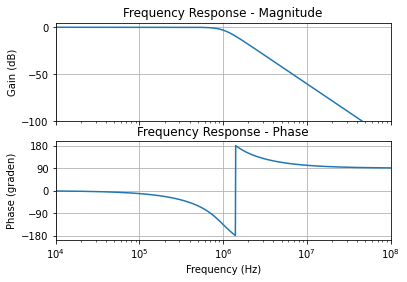

In [6]:
b3,a3 = signal.butter(3,2*np.pi*1e6,analog=True)
freqs_resp([[b3,a3]],4,8,Printcoef=False,ShowGraf=True);

We kunnen deze transferfunctie ook schrijven als functie van polen en nulpunten:

$$H(s) = \frac{\prod_{n=1}^M (s-z_n)}{\prod_{n=1}^N (s-p_n)}= \frac{1}{\prod_{n=1}^3 (s-p_n)} $$

waarbij de positie van deze nulpunten en polen de volgende is:

In [49]:
z3,p3,k3 = signal.butter(3,2*np.pi*1e6,analog=True,output='zpk')
polen_nullen(z3,p3,[[1e6,1e6,0]],Printcoef=True,ShowGraf=False);

Lijst der nullen: M= 0
Lijst der polen: N= 3
p[ 1 ] = (-3141592.6535897935+5441398.092702653j)
p[ 2 ] = (-6283185.307179586-0j)
p[ 3 ] = (-3141592.6535897935-5441398.092702653j)


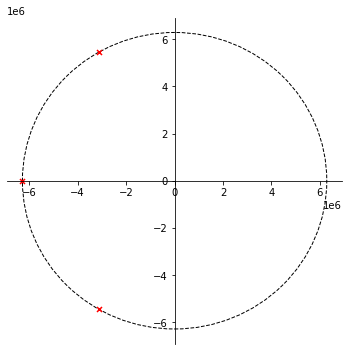

In [48]:
z3,p3,k3 = signal.butter(3,2*np.pi*1e6,analog=True,output='zpk')
polen_nullen(z3,p3,[[1e6,1e6,0]],Printcoef=False,ShowGraf=True);

We merken op dat de drie polen die bekomen werden perfect op een cirkel liggen met straal 2$\pi$ $10^6$.

We kunnen deze transferfunktie nu verder uitwerken in een product van meerdere transferfucties waarbij we de complex toegevoegde polen samennemen.

$$ H(s) = H_1(s) H_2(s)= \frac{1}{(s-p_1)(s-p_3)}\frac{1}{(s-p_2)} $$

$$  H_1(s)= \frac{1}{(s-p_1)(s-p_3)}$$ 

$$ H_2(s)= \frac{1}{(s-p_2)}$$ 


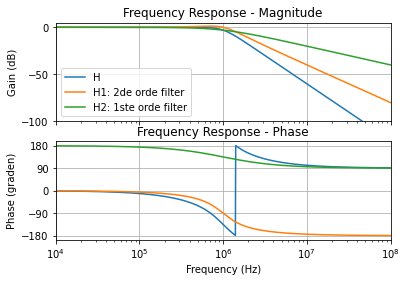

In [8]:
h1s=[[p3[0]*p3[2]],[1,-(p3[0]+p3[2]),p3[0]*p3[2]]]
h2s=[[p3[1]],[1,-p3[1]]]
freqs_resp([[b3,a3],h1s,h2s],4,8,legend=["H","H1: 2de orde filter","H2: 1ste orde filter"],Printcoef=False);

De onderstaande figuur bekijkt deze opsplitsing in detail rond de afsnijfrequentie. Hier merken we dat de overshoot in de 2de orde filter H1(s) voor een deel het sneller dalen van de eerste orde filter H2(s) compenseert

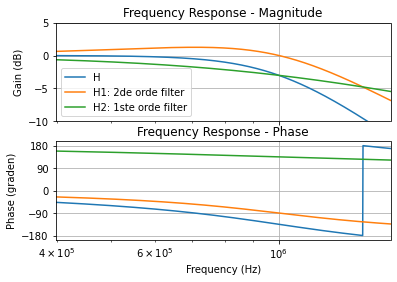

In [9]:
freqs_resp([[b3,a3],h1s,h2s],5.6,6.2,lowDB=-10,legend=["H","H1: 2de orde filter","H2: 1ste orde filter"],Printcoef=False)

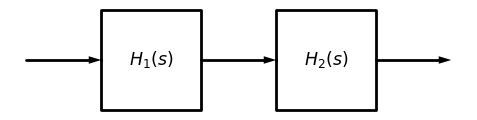

In [6]:
from schemdraw import dsp
with schemdraw.Drawing(fontsize=14) as d:
    d.add(dsp.Arrow('right', l=d.unit/2))
    h1 = d.add(dsp.Box(w=2, h=2, label='H1(s)', anchor='W'))
    d.add(dsp.Arrow('right', xy=h1.E, l=d.unit/2))
    h2 = d.add(dsp.Box(w=2, h=2, label='H2(s)', anchor='W'))
    d.add(dsp.Arrow('right', xy=h2.E, l=d.unit/2))

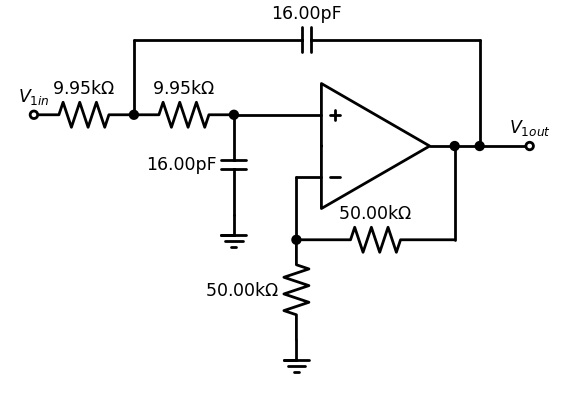

In [82]:
Sallen_and_Key_LP_draw(labels=False, Freq=1e6,angle=60,inches_per_unit=0.5, Resistorlength=2,
                           voutlabel='V1out',vinlabel='V1in')

De implementatie van H2 kan er in dit geval als het volgt  uitzien met R1= R2= 9.947 k$\Omega$ en C2 = 16pF

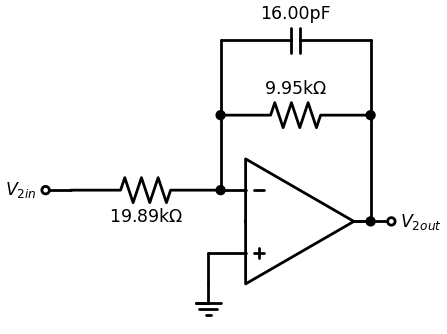

In [4]:
first_Order_LP_draw(labels=False,voutlabel='V2out',vinlabel='V2in',LFgain=0.5)

Een totale spice file van het gehele circuit ziet er dan als het volgt uit:


:::{note}
Dit is momenteel nog werk in progress. 
:::

#### Butterworth laagdoorlaatfilter van de 5de orde

Wanneer we de transferfucntie van de Butterworth laagdoorlaatfilter van de 5de orde berekenen, bekomen we de volgende coeficienten:

In [46]:
b5,a5 = signal.butter(5,2*np.pi*1e6,analog=True)
freqs_resp([[b5,a5]],4,8,Printcoef=True,ShowGraf=False);

Veelterm coefficienten teller: M= 0
b[ 0 ] = 9.792629913129003e+33
Veelterm coefficienten noemer: N= 5
a[ 5 ] = 1.0
a[ 4 ] = 20332814.76926104
a[ 3 ] = 206711678220539.9
a[ 2 ] = 1.2988077794177306e+21
a[ 1 ] = 5.043559043399954e+27
a[ 0 ] = 9.792629913129004e+33


Voor een laagdoorlaatfilter van de 5de orde is de orde van de veelterm in de teller 0 en de order van de veelterm in de noemer 5.

{numref}`filter-fig15` toont het bekomen Bode diagram van deze transferfunctie. We zien een verloop van 450 graden in de fase. Aangezien enkel 360 graden van de fase wordt weergegeven, zit er een schijnbare sprong in rond 800 kHz. Dit is geen echte sprong. De fase blijft continu verlopen.

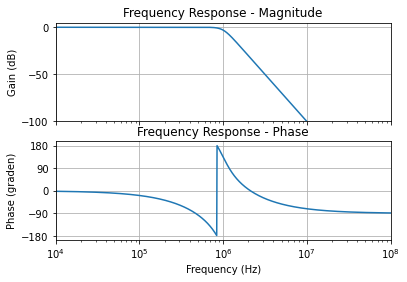

In [47]:
b5,a5 = signal.butter(5,2*np.pi*1e6,analog=True)
freqs_resp([[b5,a5]],4,8,Printcoef=False,ShowGraf=True);

In [45]:
z5,p5,k5 = signal.butter(5,2*np.pi*1e6,analog=True,output='zpk')
polen_nullen(z5,p5,[[1e6,1e6,0]],Printcoef=True,ShowGraf=False);

Lijst der nullen: M= 0
Lijst der polen: N= 5
p[ 1 ] = (-1941611.0387254667+5975664.329483111j)
p[ 2 ] = (-5083203.69231526+3693163.6609809133j)
p[ 3 ] = (-6283185.307179586-0j)
p[ 4 ] = (-5083203.69231526-3693163.6609809133j)
p[ 5 ] = (-1941611.0387254667-5975664.329483111j)


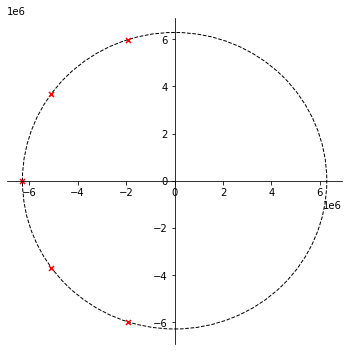

In [44]:
z5,p5,k5 = signal.butter(5,2*np.pi*1e6,analog=True,output='zpk')
polen_nullen(z5,p5,[[1e6,1e6,0]],Printcoef=False,ShowGraf=True);

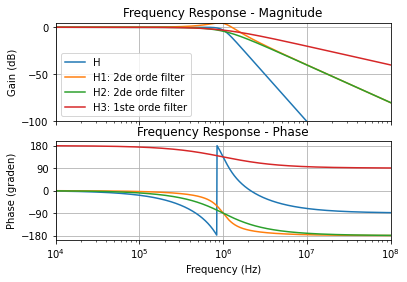

In [15]:
h1s=[[p5[0]*p5[4]],[1,-(p5[0]+p5[4]),p5[0]*p5[4]]]
h2s=[[p5[1]*p5[3]],[1,-(p5[1]+p5[3]),p5[1]*p5[3]]]
h3s=[[p5[2]],[1,-p5[2]]]
freqs_resp([[b5,a5],h1s,h2s,h3s],4,8,legend=["H","H1: 2de orde filter","H2: 2de orde filter","H3: 1ste orde filter"],Printcoef=False);

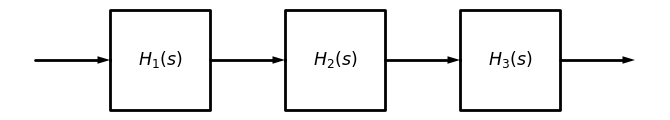

In [7]:
from schemdraw import dsp
with schemdraw.Drawing(fontsize=14) as d:
    d.add(dsp.Arrow('right', l=d.unit/2))
    h1 = d.add(dsp.Box(w=2, h=2, label='H1(s)', anchor='W'))
    d.add(dsp.Arrow('right', xy=h1.E, l=d.unit/2))
    h2 = d.add(dsp.Box(w=2, h=2, label='H2(s)', anchor='W'))
    d.add(dsp.Arrow('right', xy=h2.E, l=d.unit/2))
    h3 = d.add(dsp.Box(w=2, h=2, label='H3(s)', anchor='W'))
    d.add(dsp.Arrow('right', xy=h3.E, l=d.unit/2))

#### Vergelijking van de 3de en 5de orde Butterworth laagdoorlaatfilter

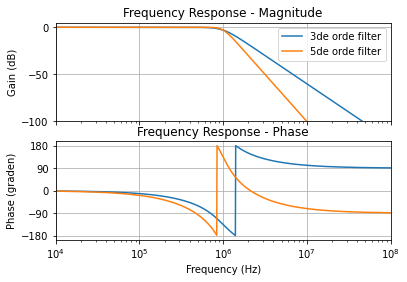

In [17]:
freqs_resp([[b3,a3],[b5,a5]],4,8,legend=["3de orde filter","5de orde filter"],Printcoef=False);

#### Zevende orde banddoorlaatfilter van 10MHz  tot 50MHz

In het eerste voorbeeld van een banddoorlaatfilter bekijken we een redelijk breedbandfilter: De bandbreedte(40 MHz) is in dit geval veel groter dan de laagste doorlaatfrequentie.

In [43]:
bc,ac = signal.butter(7,2*np.pi*np.array([10.0,50.0])*1e6,btype='bandpass',analog=True)
freqs_resp([[bc,ac]],6,9,Printcoef=True,ShowGraf=False);

Veelterm coefficienten teller: M= 7
b[ 7 ] = 6.334013983218556e+58
b[ 6 ] = 0.0
b[ 5 ] = 0.0
b[ 4 ] = 0.0
b[ 3 ] = 0.0
b[ 2 ] = 0.0
b[ 1 ] = 0.0
b[ 0 ] = 0.0
Veelterm coefficienten noemer: N= 14
a[ 14 ] = 1.0
a[ 13 ] = 1129455138.528784
a[ 12 ] = 7.760089165897884e+17
a[ 11 ] = 3.654151505077993e+26
a[ 10 ] = 1.293535546920629e+35
a[ 9 ] = 3.5017090931362664e+43
a[ 8 ] = 7.334620231296047e+51
a[ 7 ] = 1.1783749530590898e+60
a[ 6 ] = 1.4477960023023706e+68
a[ 5 ] = 1.3643931993116192e+76
a[ 4 ] = 9.948728770520122e+83
a[ 3 ] = 5.547604782936569e+91
a[ 2 ] = 2.325495035605259e+99
a[ 1 ] = 6.681091689314365e+106
a[ 0 ] = 1.1676379112645588e+114


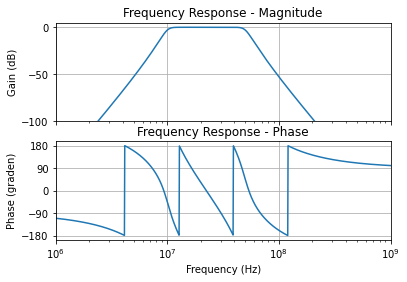

In [42]:
bc,ac = signal.butter(7,2*np.pi*np.array([10.0,50.0])*1e6,btype='bandpass',analog=True)
freqs_resp([[bc,ac]],6,9,Printcoef=False,ShowGraf=True);

Wanneer we de transferfunctie in detail analyseren, vinden we 7 nullen op frequentie 0, en 14 polen, namelijk:

In [41]:
z7,p7,k7 =signal.butter(7,2*np.pi*np.array([10.0,50.0])*1e6,btype='bandpass',analog=True,output='zpk')
polen_nullen(z7,p7,[[10e6,10e6,0],[50e6,50e6,0],[20e6,20e6,30e6],[20e6,20e6,-30e6]],Printcoef=True,ShowGraf=False);

Lijst der nullen: M= 7
z[ 1 ] = 0j
z[ 2 ] = 0j
z[ 3 ] = 0j
z[ 4 ] = 0j
z[ 5 ] = 0j
z[ 6 ] = 0j
z[ 7 ] = 0j
Lijst der polen: N= 14
p[ 1 ] = (-9467553.01746494-62713329.10036281j)
p[ 2 ] = (-30211474.606362037-61659756.49600357j)
p[ 3 ] = (-58777850.02496373-58866599.60061156j)
p[ 4 ] = (-125663706.14359173-62831853.07179589j)
p[ 5 ] = (-58777850.02496373+58866599.60061156j)
p[ 6 ] = (-30211474.606362037+61659756.49600357j)
p[ 7 ] = (-9467553.01746494+62713329.10036281j)
p[ 8 ] = (-46458057.493502825+307739438.435567j)
p[ 9 ] = (-126488603.88224223+258155439.82934594j)
p[ 10 ] = (-167660324.09626448+167913476.98651484j)
p[ 11 ] = (-125663706.14359173+62831853.07179589j)
p[ 12 ] = (-167660324.09626448-167913476.98651484j)
p[ 13 ] = (-126488603.88224223-258155439.82934594j)
p[ 14 ] = (-46458057.493502825-307739438.435567j)


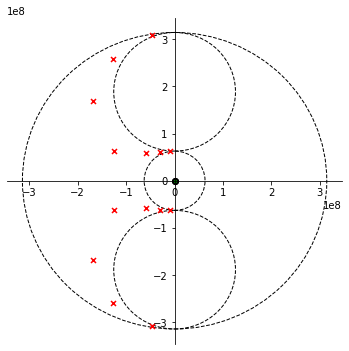

In [40]:
z7,p7,k7 =signal.butter(7,2*np.pi*np.array([10.0,50.0])*1e6,btype='bandpass',analog=True,output='zpk')
polen_nullen(z7,p7,[[10e6,10e6,0],[50e6,50e6,0],[20e6,20e6,30e6],[20e6,20e6,-30e6]],Printcoef=False,ShowGraf=True);

Er is maar een enkele goede methode om van een laagdoorlaatfilter over te  gaan naar een banddoorlaatfilter en dat is via de transformatie die aangegeven is op slide 44. Deze staat ook in je formularium. Het is natuurlijk ook belangrijk een goed gevoel te hebben van waar je verwacht uit te komen. Als je een banddoorlaatfilter hebt met een kleine bandbreedte B in vergelijking met de centrale frequentie fo, gaat dat ook redelijk goed kloppen (zoals in slide 46. Maar als B dezelfde grootteorde krijgt als fo, dan worden de polen meer en meer getrokken in de richting van de 2 afzonderlijke filters na elkaar. Om dat toe te lichten heb ik in de Jupyter een voorbeeldje gegeven van een zevende orde banddoorlaatfilter van 10MHz tot 50MHz. De centrale frequentie is 30MHz maar de bandbreedte B is 40MHz, dus groter dan de centrale frequentie. We zien hier dat de pole niet langer liggen op de 2 halve cirkels waarop we ze verwachten maar dat ze meer en meer getrokken worden in de richting van 2 andere cirkels namelijk de hoogdoorlaat van 10 MHz en de laagdoorlaat van 50 MHz.

Dit is wel een overdreven speciaal geval in de meeste gevallen is de bandbreedte B veel kleiner dan f, en dan lijkt het dat ze mooi op de kleine cirkel liggen. En dat is zeker goed als eerste benadering. Het is niet 100% exact. En dat is ook belangrijk als ingenieur om dat goed te weten.

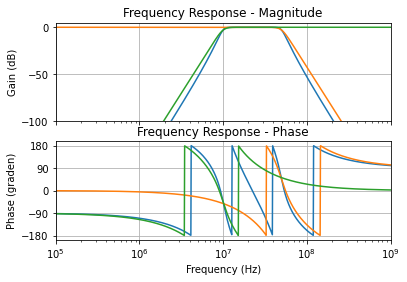

In [19]:
bl7,al7 = signal.butter(7,2*np.pi*50e6,analog=True);
bh7,ah7 = signal.butter(7,2*np.pi*10e6,btype='highpass',analog=True);
freqs_resp([[bc,ac],[bl7,al7],[bh7,ah7]],5,9,Printcoef=False);

#### 7de orde banddoorlaatfilter tussen 47 en 53 MHz

In het tweede voorbeeld van een banddoorlaatfilter bekijken we een smalle banddoorlaatfilter: De bandbreedte is in dit geval slechts 6 MHz.

In [39]:
bc2,ac2 = signal.butter(7,2*np.pi*np.array([47.0,53.0])*1e6,btype='bandpass',analog=True)
freqs_resp([[bc2,ac2]],6,9,Printcoef=True,ShowGraf=False);

Veelterm coefficienten teller: M= 7
b[ 7 ] = 1.082225670413975e+53
b[ 6 ] = 0.0
b[ 5 ] = 0.0
b[ 4 ] = 0.0
b[ 3 ] = 0.0
b[ 2 ] = 0.0
b[ 1 ] = 0.0
b[ 0 ] = 0.0
Veelterm coefficienten noemer: N= 14
a[ 14 ] = 1.0
a[ 13 ] = 169418270.77931747
a[ 12 ] = 7.027364430041076e+17
a[ 11 ] = 1.0074611841037228e+26
a[ 10 ] = 2.1017496540749808e+35
a[ 9 ] = 2.488471395316168e+43
a[ 8 ] = 3.4683129207221617e+52
a[ 7 ] = 3.2679992552874596e+60
a[ 6 ] = 3.4107645311434367e+69
a[ 5 ] = 2.406576000783415e+77
a[ 4 ] = 1.998855398085796e+86
a[ 3 ] = 9.422413939327687e+93
a[ 2 ] = 6.463381596708082e+102
a[ 1 ] = 1.5323607880306775e+110
a[ 0 ] = 8.894760315452719e+118


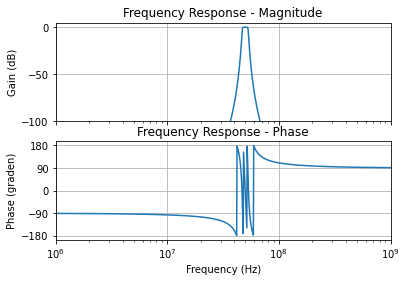

In [38]:
bc2,ac2 = signal.butter(7,2*np.pi*np.array([47.0,53.0])*1e6,btype='bandpass',analog=True)
freqs_resp([[bc2,ac2]],6,9,Printcoef=False,ShowGraf=True);

Wanneer we de polen en de nullen plotten, bekomen we het volgende resultaat.

In [37]:
z7,p7,k7 =signal.butter(7,2*np.pi*np.array([47.0,53.0])*1e6,btype='bandpass',analog=True,output='zpk')
polen_nullen(z7,p7,[[47e6,47e6,0],[53e6,53e6,0],[3e6,3e6,50e6],[3e6,3e6,-50e6]],Printcoef=True,ShowGraf=False);

Lijst der nullen: M= 7
z[ 1 ] = 0j
z[ 2 ] = 0j
z[ 3 ] = 0j
z[ 4 ] = 0j
z[ 5 ] = 0j
z[ 6 ] = 0j
z[ 7 ] = 0j
Lijst der polen: N= 14
p[ 1 ] = (-3949021.641305336-295726397.242198j)
p[ 2 ] = (-11200424.836296545-298982612.7578789j)
p[ 3 ] = (-16539450.539423024-305061656.189032j)
p[ 4 ] = (-18849555.92153874-313026248.8897938j)
p[ 5 ] = (-16539450.539423024+305061656.189032j)
p[ 6 ] = (-11200424.836296545+298982612.7578789j)
p[ 7 ] = (-3949021.641305336+295726397.242198j)
p[ 8 ] = (-4439819.935339821+332480313.6424786j)
p[ 9 ] = (-12304586.93699407+328456965.2578802j)
p[ 10 ] = (-17426275.57876118+321418687.7969175j)
p[ 11 ] = (-18849555.92153874+313026248.8897938j)
p[ 12 ] = (-17426275.57876118-321418687.7969175j)
p[ 13 ] = (-12304586.93699407-328456965.2578802j)
p[ 14 ] = (-4439819.935339821-332480313.6424786j)


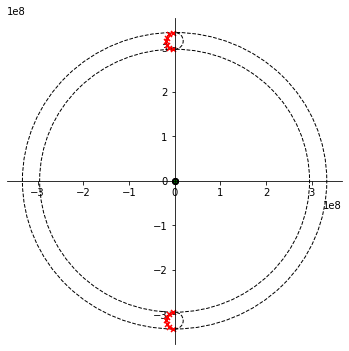

In [36]:
z7,p7,k7 =signal.butter(7,2*np.pi*np.array([47.0,53.0])*1e6,btype='bandpass',analog=True,output='zpk')
polen_nullen(z7,p7,[[47e6,47e6,0],[53e6,53e6,0],[3e6,3e6,50e6],[3e6,3e6,-50e6]],Printcoef=False,ShowGraf=True);

We merken op dat voor de heel nauwe banddoorlaat filters de polen wel op een cirkel liggen waarvan de straal overeenkomt met de bandbreedte van de filter. Het is ook zo dat het verschil tussen deze banddoorlaatfilter en een laagdoorlaatfilter gevolgd door een hoogdoorlaatfilter nu wel enorm groot is. Dat zien we al op basis van de polen hierboven en ook op basis van de transferkarakteristieken hieronder.

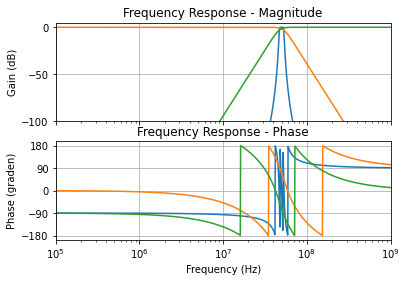

In [22]:
bl7,al7 = signal.butter(7,2*np.pi*53e6,analog=True);
bh7,ah7 = signal.butter(7,2*np.pi*47e6,btype='highpass',analog=True);
freqs_resp([[bc2,ac2],[bl7,al7],[bh7,ah7]],5,9,Printcoef=False);

### Chebyshev filters

Bij het ontwerp van een Chebyshev filter definieren we een maximale rimpel $\epsilon$. In de gehele doorlaatband moet de verzwakking van het signaal kleiner zijn dan deze waarde $\epsilon$.

#### Chebyshev 40 MHz laagdoorlaatfilter van de 3de orde met 6dB maximale ripple

In [35]:
b3,a3 = signal.cheby1(N=3,rp=6,Wn=2*np.pi*40e6,analog=True)
freqs_resp([[b3,a3]],5,9,Printcoef=True,ShowGraf=False);

Veelterm coefficienten teller: M= 0
b[ 0 ] = 2.298652790795694e+24
Veelterm coefficienten noemer: N= 3
a[ 3 ] = 1.0
a[ 2 ] = 92822184.81844565
a[ 1 ] = 5.168208012246375e+16
a[ 0 ] = 2.2986527907956946e+24


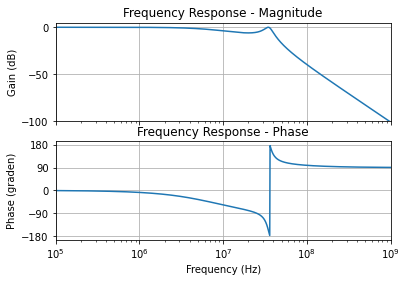

In [34]:
b3,a3 = signal.cheby1(N=3,rp=6,Wn=2*np.pi*40e6,analog=True)
freqs_resp([[b3,a3]],5,9,Printcoef=False,ShowGraf=True);

Aangezien de doorlaatband 6 dB is, is het interessant hierop eens in detail in te zoemen. Dit doen we aan de hand van de onderstaande figuur.

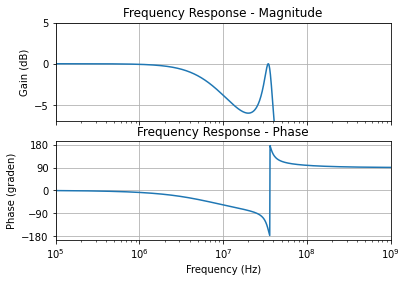

In [24]:
freqs_resp([[b3,a3]],5,9,lowDB=-7,Printcoef=False);

Bij een Chebyshev filter liggen de polen niet meer op een cirkel maar wel op een ellips. De onderstaande figuur geeft de ligging van deze polen aan.

In [33]:
delta=6
z3,p3,k3 = signal.cheby1(N=3,rp=delta,Wn=2*np.pi*40e6,analog=True,output='zpk')
eps=np.sqrt(10**(0.1*delta)-1)
polen_nullen(z3,p3,[[40e6,40e6,0],[40e6*np.sinh(np.arcsinh(1/eps)/3),40e6*np.cosh(np.arcsinh(1/eps)/3),0]],Printcoef=True,ShowGraf=False);

Lijst der nullen: M= 0
Lijst der polen: N= 3
p[ 1 ] = (-23205546.204611413+221335928.5095666j)
p[ 2 ] = (-46411092.40922282-0j)
p[ 3 ] = (-23205546.204611413-221335928.5095666j)


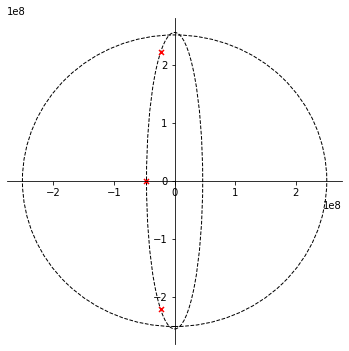

In [32]:
delta=6
z3,p3,k3 = signal.cheby1(N=3,rp=delta,Wn=2*np.pi*40e6,analog=True,output='zpk')
eps=np.sqrt(10**(0.1*delta)-1)
polen_nullen(z3,p3,[[40e6,40e6,0],[40e6*np.sinh(np.arcsinh(1/eps)/3),40e6*np.cosh(np.arcsinh(1/eps)/3),0]],Printcoef=False,ShowGraf=True);

#### Chebyshev 120 MHz laagdoorlaatfilter van de 8de orde met 2dB maximale ripple

In [31]:
b8,a8 = signal.cheby1(N=8,rp=2,Wn=2*np.pi*120e6,analog=True)
freqs_resp([[b8,a8]],5,9,Printcoef=True,ShowGraf=False);

Veelterm coefficienten teller: M= 0
b[ 0 ] = 1.0669416336250132e+69
Veelterm coefficienten noemer: N= 8
a[ 8 ] = 1.0
a[ 7 ] = 524820305.9616953
a[ 6 ] = 1.2746966037803576e+18
a[ 5 ] = 5.1937707944741785e+26
a[ 4 ] = 5.104888759746549e+35
a[ 3 ] = 1.45769782715832e+44
a[ 2 ] = 6.590270478283454e+52
a[ 1 ] = 1.0103634193419598e+61
a[ 0 ] = 1.3431999354717115e+69


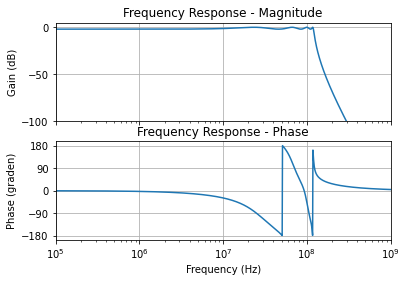

In [30]:
b8,a8 = signal.cheby1(N=8,rp=2,Wn=2*np.pi*120e6,analog=True)
freqs_resp([[b8,a8]],5,9,Printcoef=False,ShowGraf=True);

Ook voor de 8ste orde gaan we inzoemen op de doorlaatband. Hier vinden we dan ook een rimpel van 2 dB met 8 extremen terug.

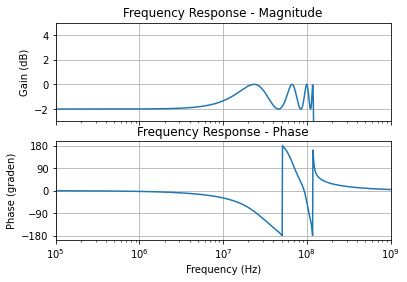

In [27]:
freqs_resp([[b8,a8]],5,9,lowDB=-3,Printcoef=False);

In [29]:
delta=2
z8,p8,k8 = signal.cheby1(N=8,rp=delta,Wn=2*np.pi*120e6,analog=True,output='zpk')
eps=np.sqrt(10**(0.1*delta)-1)
polen_nullen(z8,p8,[[120e6,120e6,0],[120e6*np.sinh(np.arcsinh(1/eps)/8),120e6*np.cosh(np.arcsinh(1/eps)/8),0]],Printcoef=True,ShowGraf=False);

Lijst der nullen: M= 0
Lijst der polen: N= 8
p[ 1 ] = (-19974783.518686887+746281824.2305412j)
p[ 2 ] = (-56883370.83720408+632667181.5530242j)
p[ 3 ] = (-85131980.59479763+422734695.6263414j)
p[ 4 ] = (-100420018.03015907+148444684.39010677j)
p[ 5 ] = (-100420018.03015907-148444684.39010677j)
p[ 6 ] = (-85131980.59479763-422734695.6263414j)
p[ 7 ] = (-56883370.83720408-632667181.5530242j)
p[ 8 ] = (-19974783.518686887-746281824.2305412j)


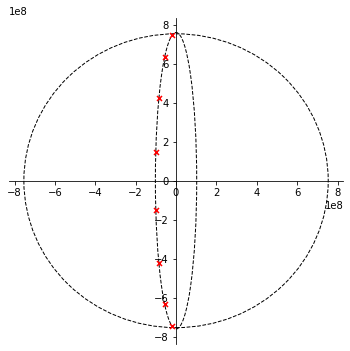

In [28]:
delta=2
z8,p8,k8 = signal.cheby1(N=8,rp=delta,Wn=2*np.pi*120e6,analog=True,output='zpk')
eps=np.sqrt(10**(0.1*delta)-1)
polen_nullen(z8,p8,[[120e6,120e6,0],[120e6*np.sinh(np.arcsinh(1/eps)/8),120e6*np.cosh(np.arcsinh(1/eps)/8),0]],Printcoef=False,ShowGraf=True);

Wanneer we de Butterworth met Chebychev vergelijken merken we dat hoe meer passband we toelaten, hoe stijler flank is aan het einde van de doorlaatband. Dit is dan ook het belangrijke ontwerpcompromis.

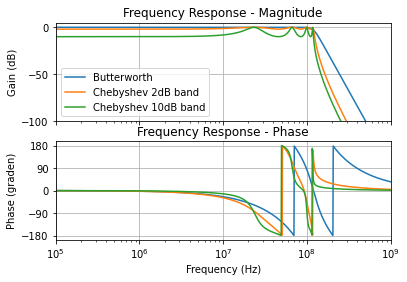

In [29]:
bb8,aa8 = signal.butter(8,2*np.pi*120e6,analog=True)
bc8,ac8 = signal.cheby1(N=8,rp=10,Wn=2*np.pi*120e6,analog=True)
freqs_resp([[bb8,aa8],[b8,a8],[bc8,ac8]],5,9,legend=[r"Butterworth",r"Chebyshev 2dB band",r"Chebyshev 10dB band"],Printcoef=False);

#### Chebyshev 30 MHz laagdoorlaatfilter van de 2de orde met 6dB maximale ripple

In [27]:
b2,a2 = signal.cheby1(N=2,rp=3,Wn=2*np.pi*30e6,analog=True)
freqs_resp([[b2,a2]],5,9,Printcoef=True,ShowGraf=False)

Veelterm coefficienten teller: M= 0
b[ 0 ] = 1.780752121671573e+16
Veelterm coefficienten noemer: N= 2
a[ 2 ] = 1.0
a[ 1 ] = 121560720.41014235
a[ 0 ] = 2.5153792295277244e+16


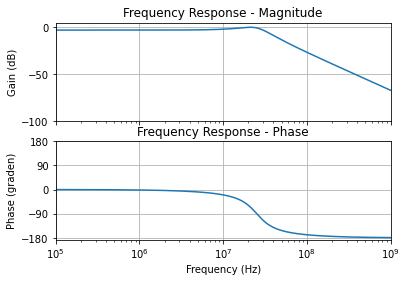

In [26]:
b2,a2 = signal.cheby1(N=2,rp=3,Wn=2*np.pi*30e6,analog=True)
freqs_resp([[b2,a2]],5,9,Printcoef=False,ShowGraf=True)

In [25]:
p2,n2,k2 = signal.cheby1(N=2,rp=3,Wn=2*np.pi*30e6,analog=True,output='zpk')
polen_nullen(p2,n2,[[30e6,30e6,0],[30e6*np.sinh(np.arcsinh(1)/2),30e6*np.cosh(np.arcsinh(1)/2),0]],Printcoef=True,ShowGraf=False);

Lijst der nullen: M= 0
Lijst der polen: N= 2
p[ 1 ] = (-60780360.20507117+146490750.93199244j)
p[ 2 ] = (-60780360.20507117-146490750.93199244j)


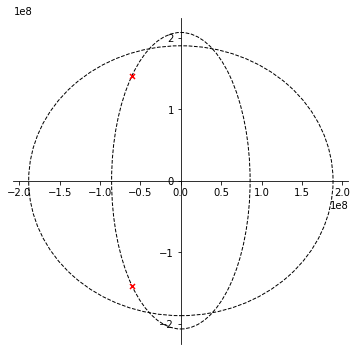

In [24]:
p2,n2,k2 = signal.cheby1(N=2,rp=3,Wn=2*np.pi*30e6,analog=True,output='zpk')
polen_nullen(p2,n2,[[30e6,30e6,0],[30e6*np.sinh(np.arcsinh(1)/2),30e6*np.cosh(np.arcsinh(1)/2),0]],Printcoef=False,ShowGraf=True);

We kunnen deze 2de orde laagdoorlaatfilter ook maken met een Sallen en Key circuit als aangegeven in {numref}`Sallen_en_Key`. we merken op dat de frequentie waarop dit circuit gaat afsnijden een stuk lager is dan de frequentie van het overeenkomende Butterworth circuit. De juiste afsnijfrequentie kunnen we uitrekenen op basis van de  polen en deze is:

In [3]:
np.abs(-60780360.20507117+146490750.93199244j)/np.pi/2

25241889.828472663

Dit is dus afgerond iets in de buurt van 25 MHz. Van de andere kant gaat de hoek dat de polen maken met de x-as een stuk groter gaan zijn dan de 45 graden bij Butterworth. Ook dit kunnen we uitrekenen op basis van de polen en we komen hiervoor de volgende waarde uit:

In [5]:
import cmath 
cmath.polar(60780360.20507117+146490750.93199244j)[1]/np.pi*180

67.46598822997034

Als een gevolg van deze hoek van 67 graden, zullen we als ratio tussen de 2 weerstanden $R_1$ en $R_2$ van het Sallen en Key circuit uit {numref}`Sallen_en_Key` een k-factor hebben die gelijk is aan:

In [6]:
2-2*np.cos(cmath.polar(60780360.20507117+146490750.93199244j)[1])

1.23353640830558

### Bessel Thomson filters

Het voornaamste doel van een Bessel Thomson filter is een lineair verloop te bekomen van het fase verloop in de buurt van de afsnijfrequentie. Hierdoor wordt de vorm van een puls beter behouden. In dit vak zullen we de Bessel Thomson filters steeds met de computer uitrekenen. Hieronder vind je de berekening van de coeficienten van de transfer functie een 2de orde Bessel Thomson  hoogdoorlaatfilter met afsnijfrequentie op 1 kHz.

In {numref}`BesselTomson-fig`  zie je dan vervolgens de plot van de transferkarakteristiek een 2de orde Bessel Thomson  hoogdoorlaatfilter

In [23]:
bt2,at2 = signal.bessel(2,2*np.pi*1e3,btype="highpass", analog=True)
freqs_resp([[bt2,at2]],1,5,Printcoef=True,ShowGraf=False)

Veelterm coefficienten teller: M= 2
b[ 2 ] = 1.0
b[ 1 ] = 0.0
b[ 0 ] = 0.0
Veelterm coefficienten noemer: N= 2
a[ 2 ] = 1.0
a[ 1 ] = 10882.796185405305
a[ 0 ] = 39478417.60435742


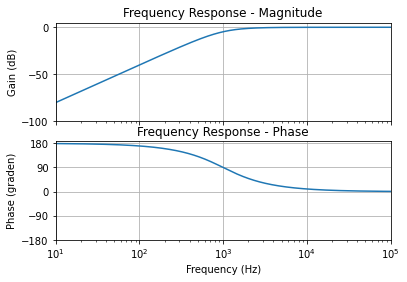

In [22]:
bt2,at2 = signal.bessel(2,2*np.pi*1e3,btype="highpass", analog=True)
freqs_resp([[bt2,at2]],1,5,Printcoef=False,ShowGraf=True)

#### Analyze van deze coëfficiënten

$a_0 = 1$  

$a_1 = \frac{\omega_c}{Q}$   met $ Q = 0.57735$

$a_2 = \omega_c^2$  

## Toleranties

Het is heel erg belangrijk rekening te houden met de  [toleranties](https://ccrma.stanford.edu/~jatin/Bad-Circuit-Modelling/Tolerances.html) van de componenten die we hebben. De meeste leveranciers van weerstanden voorzien een ruime marge op de weerstandswaarde die geleverd wordt, typisch bv +/-$5\%$ of +/-$1\%$. Een aantal ontwerpen zijn hier zeer gevoelig voor. Bij het maken van een ontwerp moet je dan ook rekening houden met deze variaties.



## Zelftest via Flashcards

$\,\!$

Klik op de vraag als je je antwoord wil nakijken. Klik op next om de volgende vraag te bekomen.


In [2]:
# zolang nbconvert een foute scaling neemt, zetten we dit op remove_cell4reveal in de slides.
# waarom verdwijnt dit na heropenen als not trusted
from jupytercards import display_flashcards
a=[{"front": "Butterworth filter",
    "back": "Een filter die maximaal vlak is rond de referentiefrequentie. De referentiefrequentie is 0 voor een laagdoorlaatfilter, oneindig voor een hoogdoorlaatfilter en de centrale frequentie voor een banddoorlaatfilter"},
   {"front": "Bessel-Thomson filter",
    "back": "Een filter waarbij de fase-vertraging zo lineair mogelijk verloopt met de frequentie"}]
display_flashcards(a)

<IPython.core.display.Javascript object>